## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
%matplotlib inline

In [48]:
df = pd.read_csv('kc_house_data.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [50]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrubbing

In [51]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [52]:
df['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [53]:
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [54]:
df = df.dropna()

In [55]:
df['yr_renovated'] = df['yr_renovated'].astype(int)

In [56]:
df['date'] = pd.to_datetime(df['date'])

In [57]:
df = df.drop(['waterfront'], axis=1)

In [58]:
df.bathrooms = df.bathrooms.astype(int)

In [59]:
df.sqft_basement.str.isnumeric().count()

15762

In [60]:
df.sqft_basement.head()

1     400.0
3     910.0
4       0.0
5    1530.0
6         ?
Name: sqft_basement, dtype: object

In [61]:
df.sqft_basement.describe()

count     15762
unique      283
top         0.0
freq       9362
Name: sqft_basement, dtype: object

In [62]:
df['sqft_basement'] = df['sqft_basement'].dropna()


In [63]:
df['sqft_basement'].isna().sum()

0

In [64]:
df['sqft_basement'].head()

1     400.0
3     910.0
4       0.0
5    1530.0
6         ?
Name: sqft_basement, dtype: object

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 20 columns):
id               15762 non-null int64
date             15762 non-null datetime64[ns]
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null int64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
view             15762 non-null float64
condition        15762 non-null int64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null object
yr_built         15762 non-null int64
yr_renovated     15762 non-null int64
zipcode          15762 non-null int64
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(13), object(1)
memory usage: 2.5+ MB


In [66]:
bob = df[df['sqft_basement']=="?"].index

In [67]:
type(bob)

pandas.core.indexes.numeric.Int64Index

In [68]:
bob

Int64Index([    6,    18,    42,    79,   112,   217,   384,   508,   633,
              645,
            ...
            20992, 21000, 21017, 21087, 21109, 21210, 21357, 21365, 21442,
            21519],
           dtype='int64', length=333)

In [69]:
df.drop(bob , inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 20 columns):
id               15429 non-null int64
date             15429 non-null datetime64[ns]
price            15429 non-null float64
bedrooms         15429 non-null int64
bathrooms        15429 non-null int64
sqft_living      15429 non-null int64
sqft_lot         15429 non-null int64
floors           15429 non-null float64
view             15429 non-null float64
condition        15429 non-null int64
grade            15429 non-null int64
sqft_above       15429 non-null int64
sqft_basement    15429 non-null object
yr_built         15429 non-null int64
yr_renovated     15429 non-null int64
zipcode          15429 non-null int64
lat              15429 non-null float64
long             15429 non-null float64
sqft_living15    15429 non-null int64
sqft_lot15       15429 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(13), object(1)
memory usage: 2.5+ MB


In [71]:
df.sqft_basement.where(df.sqft_basement == "0.0").count()

9362

61% of sqft_basement is 0, which means that most houses in the dataset do not have basements. Might be worth creating a feature that states whether a house has a basement or not. For now I'll leave it in, but convert it back to integer since we'll be comparing the size of the basement instead of considering it categorically.

In [72]:
df['sqft_basement'] = df.sqft_basement.astype(float)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 20 columns):
id               15429 non-null int64
date             15429 non-null datetime64[ns]
price            15429 non-null float64
bedrooms         15429 non-null int64
bathrooms        15429 non-null int64
sqft_living      15429 non-null int64
sqft_lot         15429 non-null int64
floors           15429 non-null float64
view             15429 non-null float64
condition        15429 non-null int64
grade            15429 non-null int64
sqft_above       15429 non-null int64
sqft_basement    15429 non-null float64
yr_built         15429 non-null int64
yr_renovated     15429 non-null int64
zipcode          15429 non-null int64
lat              15429 non-null float64
long             15429 non-null float64
sqft_living15    15429 non-null int64
sqft_lot15       15429 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(13)
memory usage: 2.5 MB


## Multicolinearity?

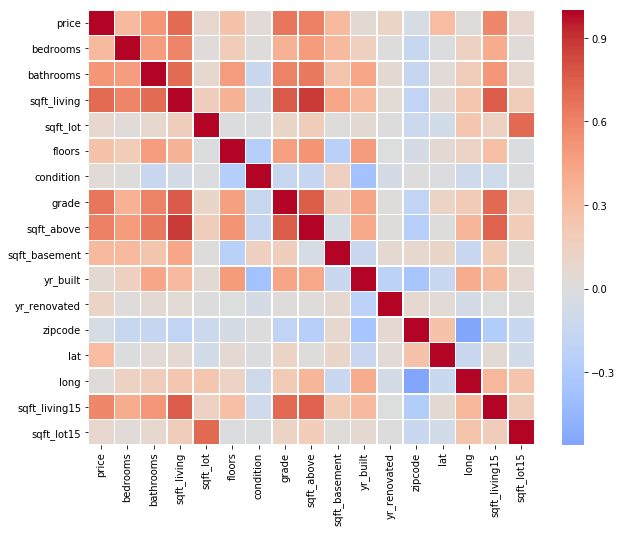

In [85]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), center=0, linewidths=.5, cmap="coolwarm");

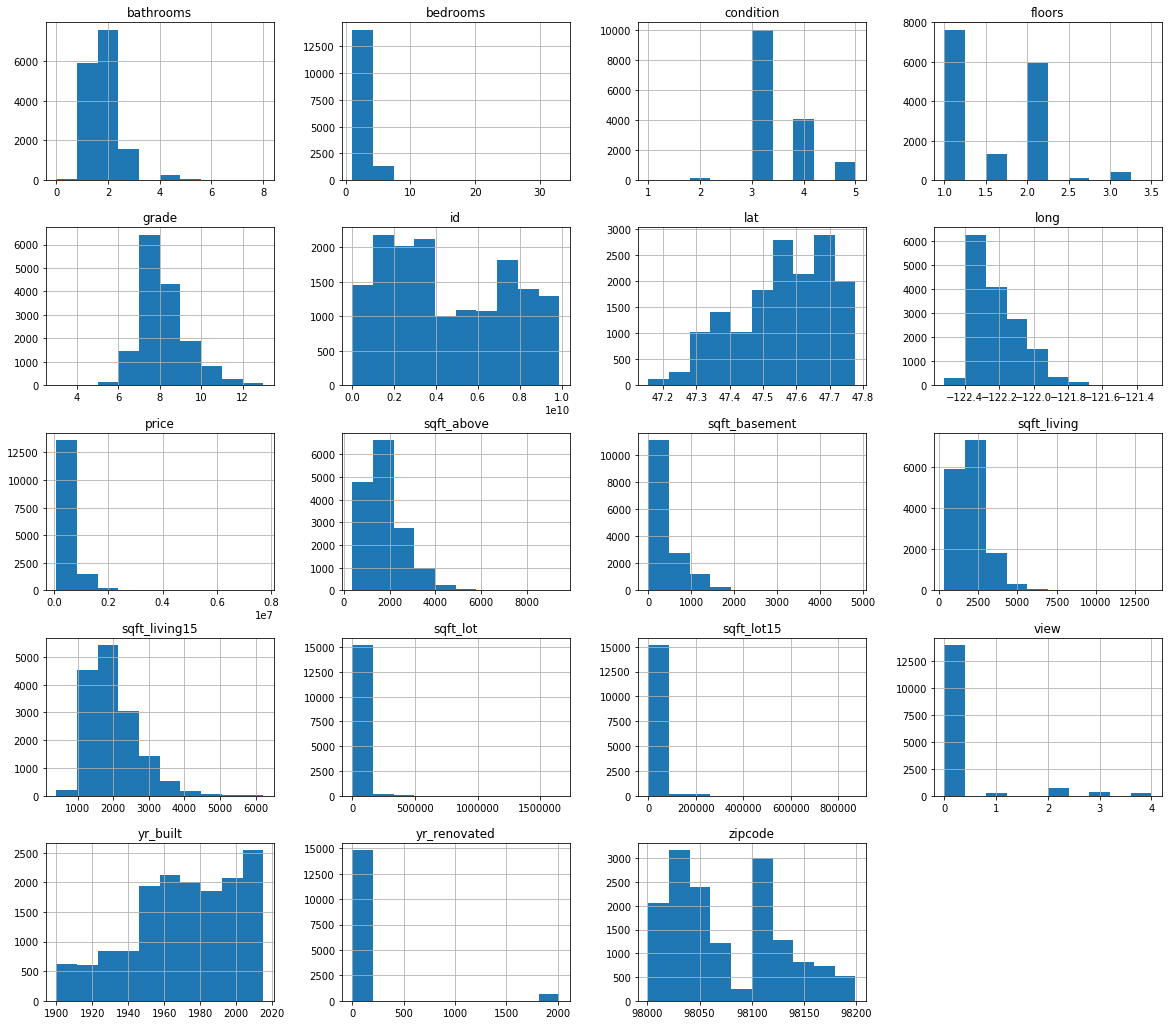

In [74]:
df.hist(figsize = (20,18));

In [75]:
df = df.drop(['id','view'], axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 18 columns):
date             15429 non-null datetime64[ns]
price            15429 non-null float64
bedrooms         15429 non-null int64
bathrooms        15429 non-null int64
sqft_living      15429 non-null int64
sqft_lot         15429 non-null int64
floors           15429 non-null float64
condition        15429 non-null int64
grade            15429 non-null int64
sqft_above       15429 non-null int64
sqft_basement    15429 non-null float64
yr_built         15429 non-null int64
yr_renovated     15429 non-null int64
zipcode          15429 non-null int64
lat              15429 non-null float64
long             15429 non-null float64
sqft_living15    15429 non-null int64
sqft_lot15       15429 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(12)
memory usage: 2.2 MB


/anaconda2/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


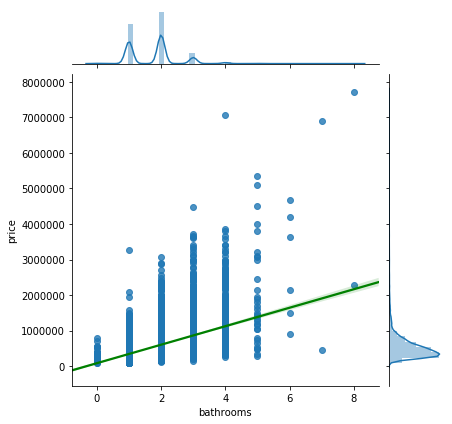

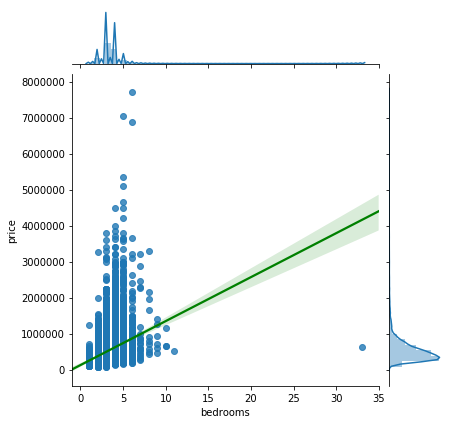

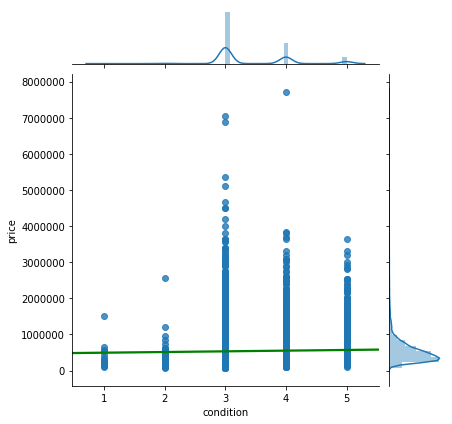

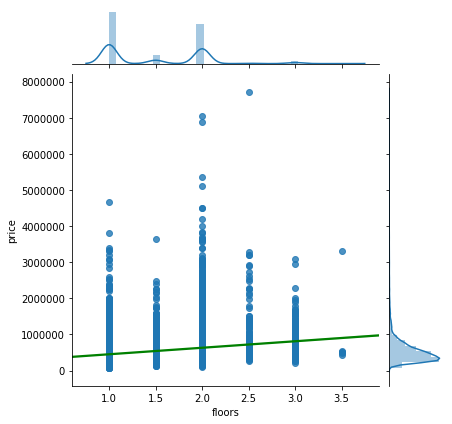

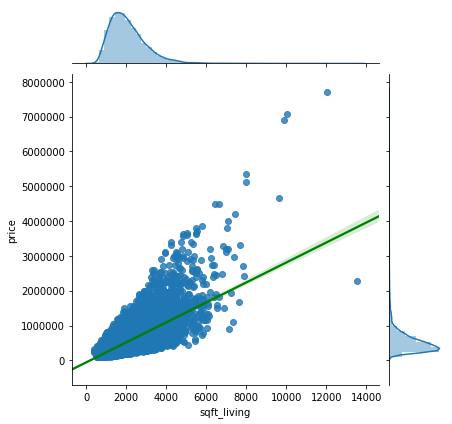

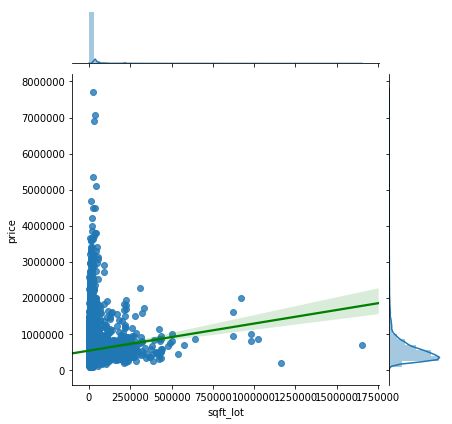

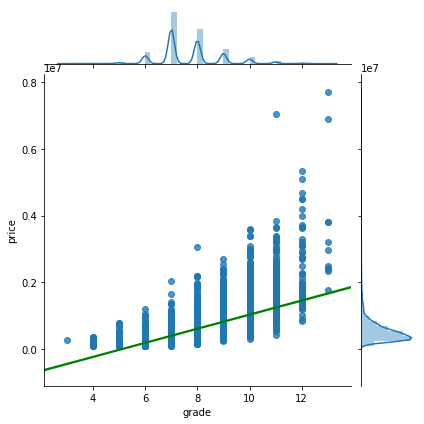

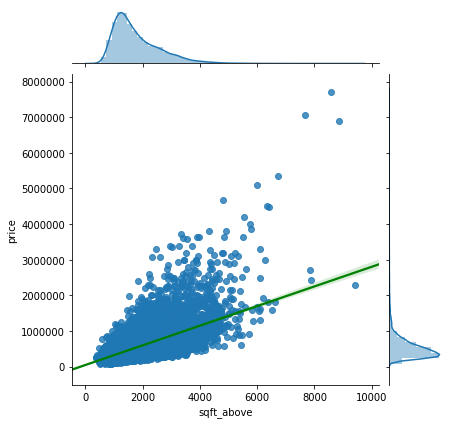

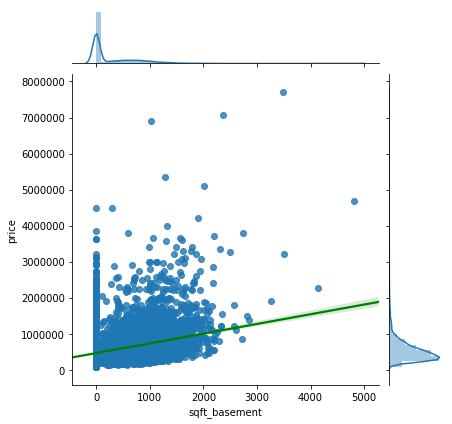

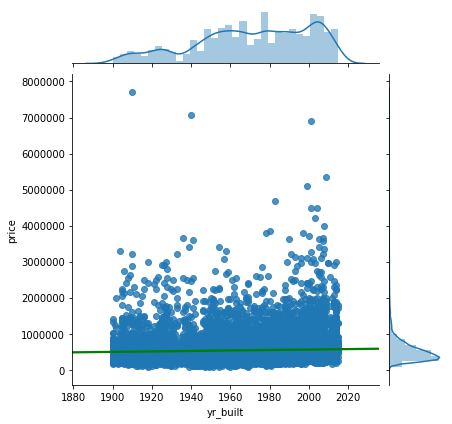

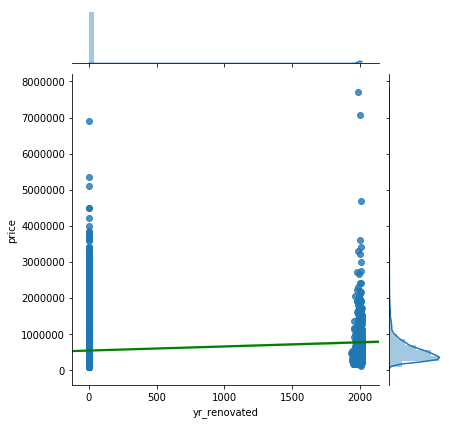

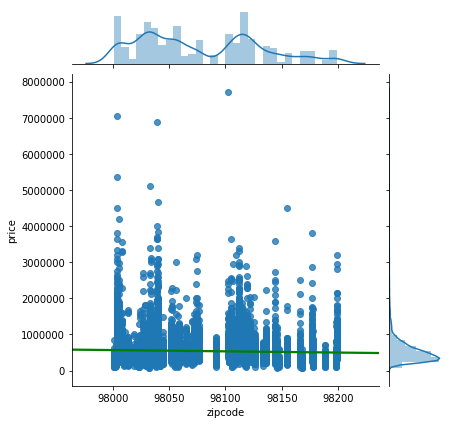

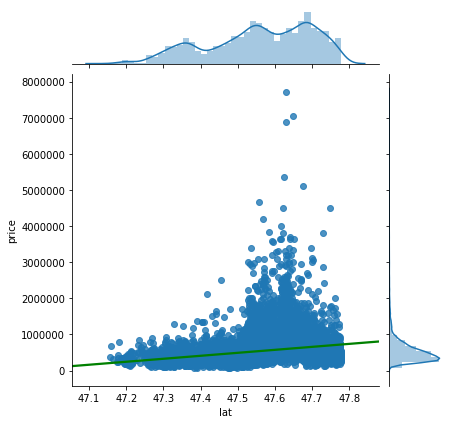

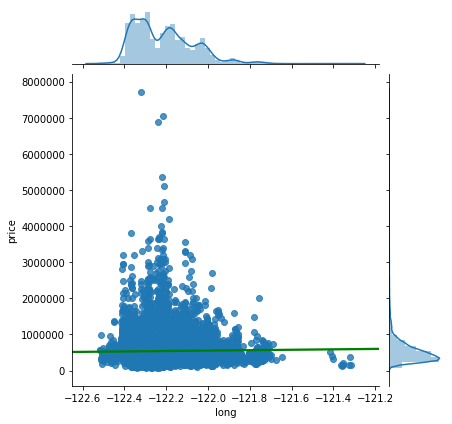

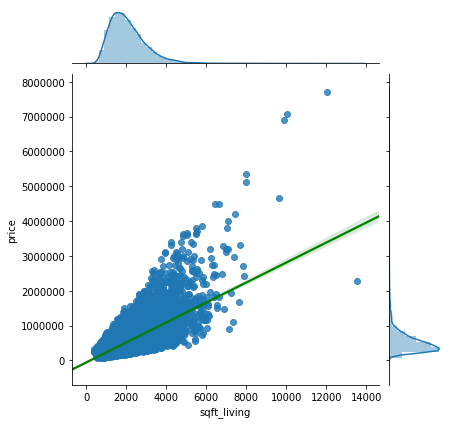

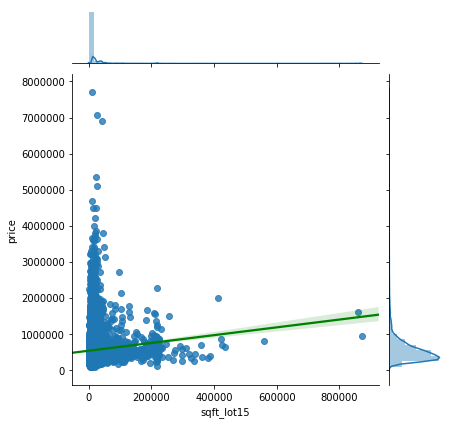

In [77]:
for column in ['bathrooms', 'bedrooms', 'condition',
       'floors', 'sqft_living', 'sqft_lot', 'grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long',
              'sqft_living','sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})

In [78]:
df.where(df['bedrooms'] >10).count()

date             2
price            2
bedrooms         2
bathrooms        2
sqft_living      2
sqft_lot         2
floors           2
condition        2
grade            2
sqft_above       2
sqft_basement    2
yr_built         2
yr_renovated     2
zipcode          2
lat              2
long             2
sqft_living15    2
sqft_lot15       2
dtype: int64

In [79]:
outbed = df[df['bedrooms'] >10].index

In [80]:
df.drop(outbed , inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15427 entries, 1 to 21596
Data columns (total 18 columns):
date             15427 non-null datetime64[ns]
price            15427 non-null float64
bedrooms         15427 non-null int64
bathrooms        15427 non-null int64
sqft_living      15427 non-null int64
sqft_lot         15427 non-null int64
floors           15427 non-null float64
condition        15427 non-null int64
grade            15427 non-null int64
sqft_above       15427 non-null int64
sqft_basement    15427 non-null float64
yr_built         15427 non-null int64
yr_renovated     15427 non-null int64
zipcode          15427 non-null int64
lat              15427 non-null float64
long             15427 non-null float64
sqft_living15    15427 non-null int64
sqft_lot15       15427 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(12)
memory usage: 2.2 MB


/anaconda2/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


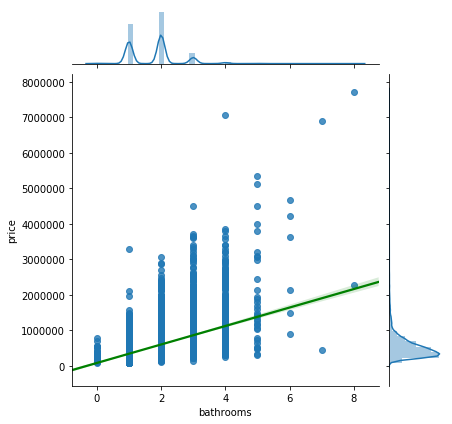

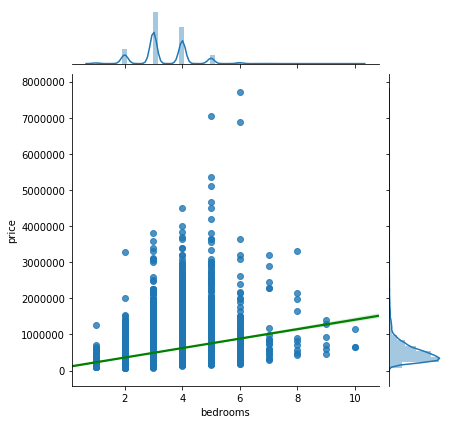

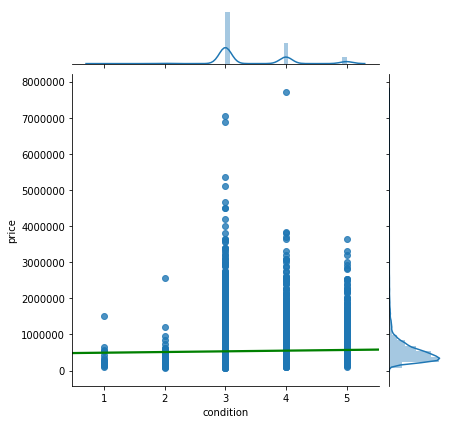

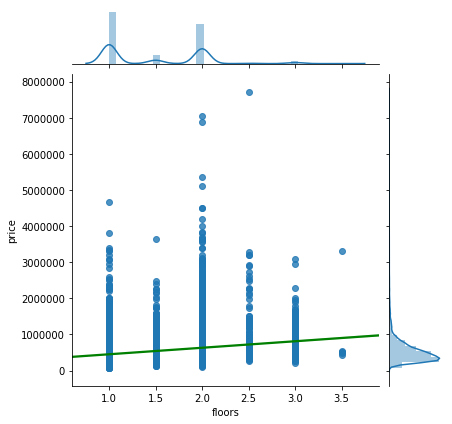

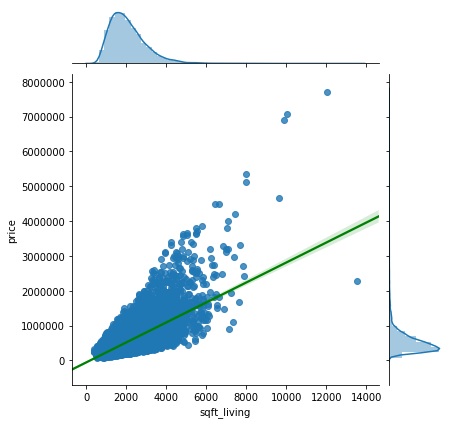

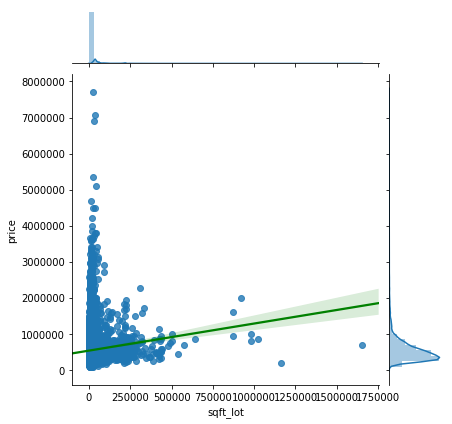

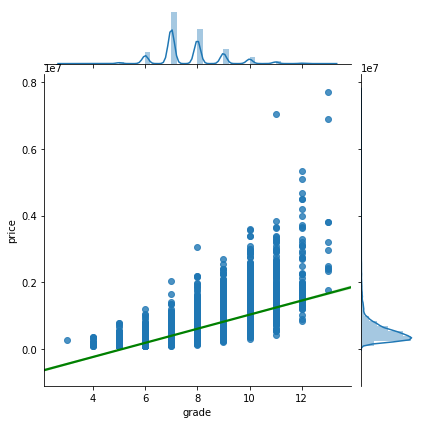

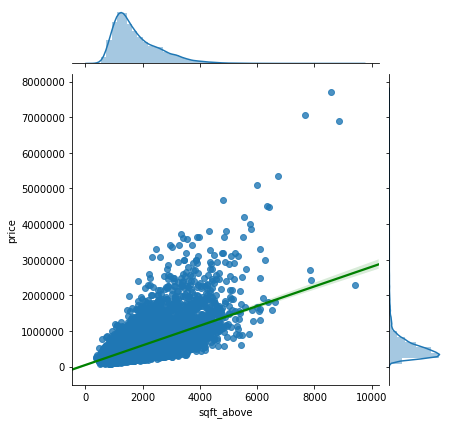

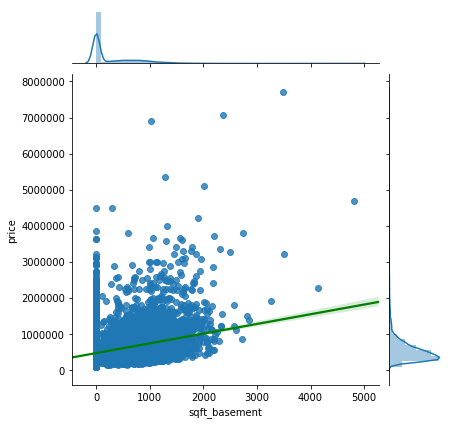

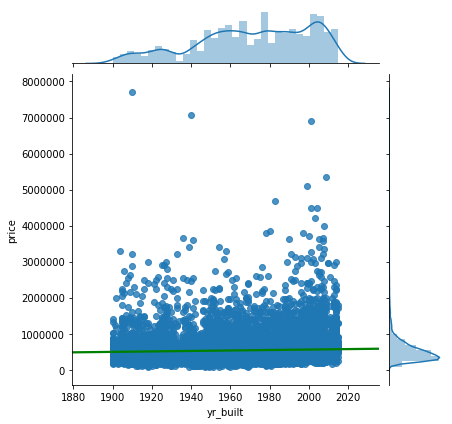

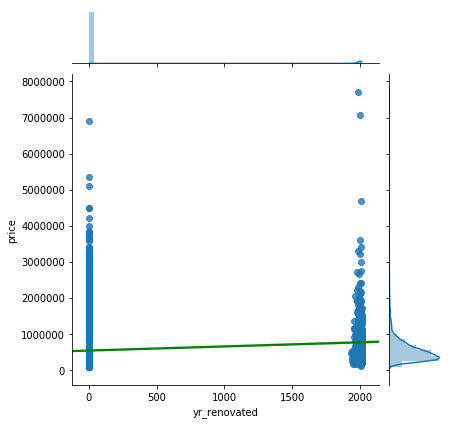

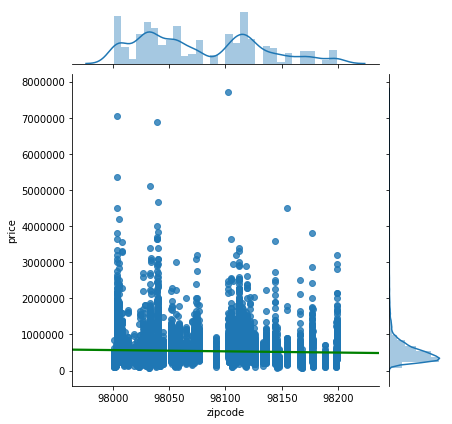

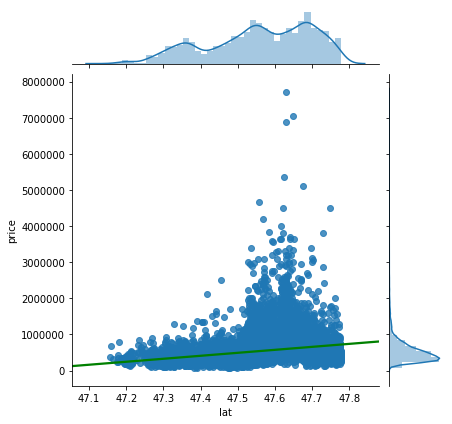

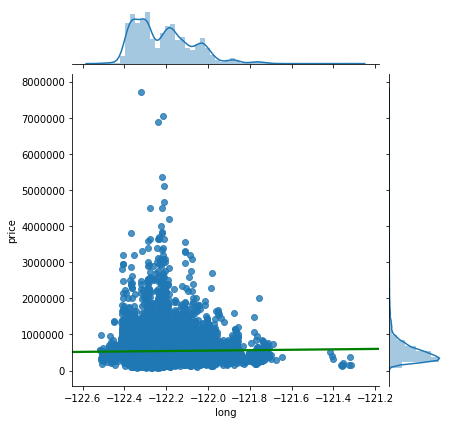

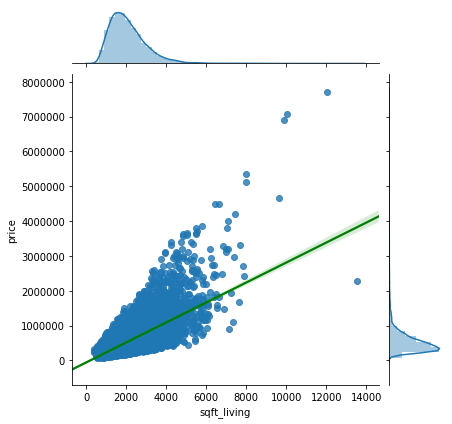

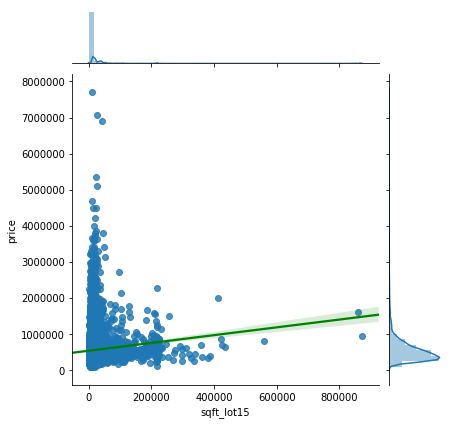

In [82]:
for column in ['bathrooms', 'bedrooms', 'condition',
       'floors', 'sqft_living', 'sqft_lot', 'grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long',
              'sqft_living','sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})